# Avance Proyecto 1: Análisis eploratorio

### Subtítulo:
Descripción de por qué es necesario

In [10]:
#Código

### Cantidad de compras registradas por la tienda:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_csv('data/customer_purchases_train.csv')
total_ventas = len(df)

print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de usuarios:


In [12]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()

print(f"Cantidad de clientes únicos: {unique_customers}")


Cantidad de clientes únicos: 500


### Clientes con múltiples compras

SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


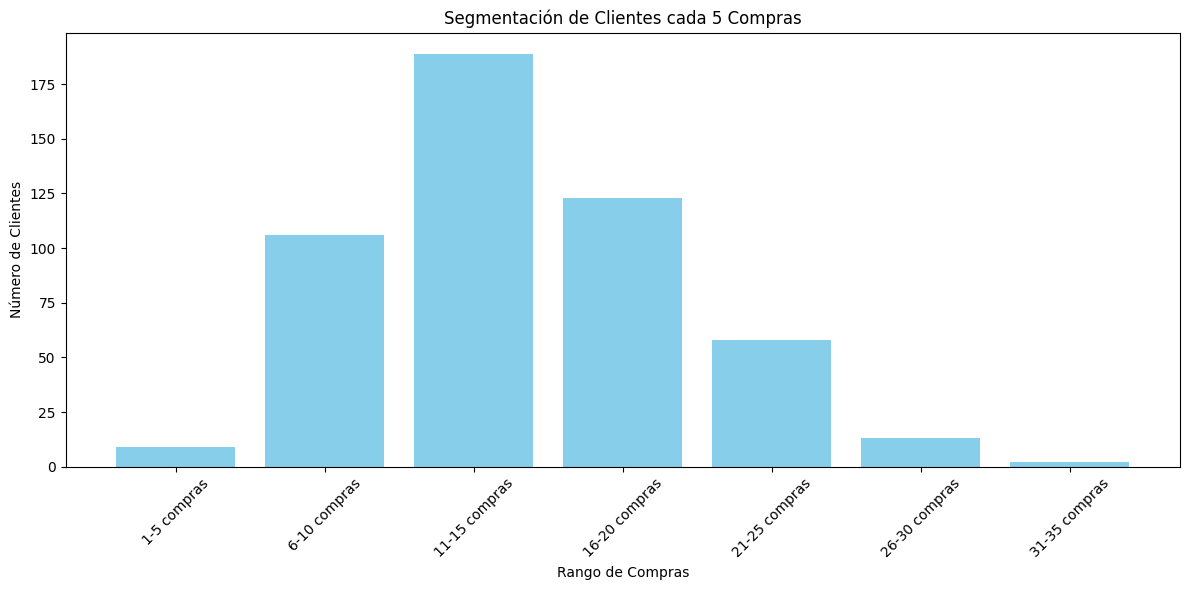


Segmentación con IDs guardada en 'segmentacion_clientes.json'


In [16]:
customer_freq = df['customer_id'].value_counts()

segmentos_con_ids = {}
segmentos_para_grafico = {}

for i in range(1, customer_freq.max() + 1, 5):
    segmento_min = i
    segmento_max = i + 4
    segment_name = f'{segmento_min}-{segmento_max} compras'
    
    # Filtrar clientes en este segmento
    clientes_segmento = customer_freq[
        (customer_freq >= segmento_min) & (customer_freq <= segmento_max)
    ].index.tolist()
    
    if clientes_segmento:
        segmentos_con_ids[segment_name] = {
            'cantidad_clientes': len(clientes_segmento),
            'ids_clientes': clientes_segmento
        }
        segmentos_para_grafico[segment_name] = len(clientes_segmento)

# Mostrar segmentos
print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for segmento, cantidad in segmentos_para_grafico.items():
    print(f"{segmento}: {cantidad} clientes")

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(segmentos_para_grafico.keys(), segmentos_para_grafico.values(), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar segmentación con IDs para uso futuro
segmentos_para_guardar = {
    segmento: {
        'cantidad_clientes': info['cantidad_clientes'],
        'ids_clientes': info['ids_clientes']
    }
    for segmento, info in segmentos_con_ids.items()
}

with open('segmentacion_clientes.json', 'w') as f:
    json.dump(segmentos_para_guardar, f, indent=2)

print(f"\nSegmentación con IDs guardada en 'segmentacion_clientes.json'")